## This module builds Machine Learning models on the data & visualize their accuracies with & without Cross validation

In [1]:
# Filter & ignore warnings for clear output visualization

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import all necessary packages

import os
import pandas as pd
from decimal import Decimal
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
# Import packages associated with the ML models considered

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
# Import packages associated with Model Evaluation to get a numerical analysis

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:
# Define global variables we use throughout
current_directory = os.getcwd()
current_directory = current_directory.replace("/Single-Use-Code", "")
data_path = current_directory + "/Datasets-CSV"

data = pd.read_csv(data_path + "/Disease_Symptom_Dataset_For_All_Symptom_Subsets.csv")
X = data.iloc[:, 1:]
Y = data.iloc[:, 0:1]

# Split with 85%-15% ratio
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

# Variables to store the accuracies with & without cross validation
model_list = []
model_accuracy_with_cross_validation = []
model_accuracy_without_cross_validation = []

### Functions to use Machine Learning Models

In [6]:
# Defines a function to use Logistic Regression 

def LogisticRegressionModel():
    
    global x_train, x_test, y_train, y_test
    
    # Create Logistic Regression Classifier & fit the data to it
    lr_classifier = LogisticRegression()
    lr_classifier = lr_classifier.fit(x_train, y_train)
    
    # Make predictions based using Logistic Regression
    lr_prediction = lr_classifier.predict(x_test)
    
    # Find the accuracy obtained
    lr_accuracy = round(Decimal(accuracy_score(y_test, lr_prediction) * 100), 2)
    
    # Append accuracy to the global list
    model_list.append("LR")
    model_accuracy_without_cross_validation.append(lr_accuracy)
    
    # Using cross validation with 5 splits 
    lr_accuracies = cross_val_score(lr_classifier, X, Y, cv=10)
    
    # Find the cross validation accuracy by taking mean over obtained accuracies
    lr_mean_accuracy = round(Decimal(lr_accuracies.mean() * 100), 2)
    model_accuracy_with_cross_validation.append(lr_mean_accuracy)
    
    # Track the results
    print("\n----- LOGISTIC REGRESSION -----")
    
    print(f"Accuracy without cross validation: {lr_accuracy}%")
    print(f"Accuracy with cross validation: {lr_mean_accuracy}%")
    print("\nTop few rows of the Classification Report: ")
    classification_report_result = classification_report(y_test, lr_prediction, output_dict=True)
    dataframe = pd.DataFrame(classification_report_result).transpose()
    print(dataframe.head().to_string())
    #print(dataframe.to_string())
    

In [7]:
# Defines a function to use Random Forest Classifier

def RandomForestModel():
    
    global x_train, x_test, y_train, y_test
    
    # Create Random Forest Classifier & fit the data to it
    rf_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy')
    rf_classifier = rf_classifier.fit(x_train, y_train)
    
    # Make predictions based using Logistic Regression
    rf_prediction = rf_classifier.predict(x_test)
    
    # Find the accuracy obtained
    rf_accuracy = round(Decimal(accuracy_score(y_test, rf_prediction) * 100), 2)
    
    # Append accuracy to the global list
    model_list.append("RF")
    model_accuracy_without_cross_validation.append(rf_accuracy)
    
    # Using cross validation with 5 splits 
    rf_accuracies = cross_val_score(rf_classifier, X, Y, cv=10)
    
    # Find the cross validation accuracy by taking mean over obtained accuracies
    rf_mean_accuracy = round(Decimal(rf_accuracies.mean() * 100), 2)
    model_accuracy_with_cross_validation.append(rf_mean_accuracy)
    
    # Track the results
    print("\n----- RANDOM FOREST -----")
    print(f"Accuracy without cross validation: {rf_accuracy}%")
    print(f"Accuracy with cross validation: {rf_mean_accuracy}%")
    print("Top few rows of Classification Report: ")
    classification_report_result = classification_report(y_test, rf_prediction, output_dict=True)
    dataframe = pd.DataFrame(classification_report_result).transpose()
    print(dataframe.head().to_string())
    #print(dataframe.to_string())
    

In [8]:
# Defines a function to use KNN Classifier

def KnnModel():
    
    global x_train, x_test, y_train, y_test
    
    # Create KNN Classifier & fit the data to it
    knn_classifier = KNeighborsClassifier(n_neighbors=10, weights='distance', n_jobs=4)
    knn_classifier = knn_classifier.fit(x_train, y_train)
    
    # Make predictions based using Logistic Regression
    knn_prediction = knn_classifier.predict(x_test)
    
    # Find the accuracy obtained
    knn_accuracy = round(Decimal(accuracy_score(y_test, knn_prediction) * 100), 2)
    
    # Append accuracy to the global list
    model_list.append("KNN")
    model_accuracy_without_cross_validation.append(knn_accuracy)
    
    # Using cross validation with 5 splits 
    knn_accuracies = cross_val_score(knn_classifier, X, Y, cv=10)
    
    # Find the cross validation accuracy by taking mean over obtained accuracies
    knn_mean_accuracy = round(Decimal(knn_accuracies.mean() * 100), 2)
    model_accuracy_with_cross_validation.append(knn_mean_accuracy)
    
    # Track the results
    print("\n----- KNN CLASSIFIER -----")
    print(f"Accuracy without cross validation: {knn_accuracy}%")
    print(f"Accuracy with cross validation: {knn_mean_accuracy}%")
    print("Top few rows of Classification Report: ")
    classification_report_result = classification_report(y_test, knn_prediction, output_dict=True)
    dataframe = pd.DataFrame(classification_report_result).transpose()
    print(dataframe.head().to_string())
    #print(dataframe.to_string())
    

In [9]:
# Defines a function to use Multinomial Naive Bayes Classifier

def MultinomialNBModel():
    
    global x_train, x_test, y_train, y_test
    
    # Create MNB Classifier & fit the data to it
    mnb_classifier = MultinomialNB()
    mnb_classifier = mnb_classifier.fit(x_train, y_train)
    
    # Make predictions based using Logistic Regression
    mnb_prediction = mnb_classifier.predict(x_test)
    
    # Find the accuracy obtained
    mnb_accuracy = round(Decimal(accuracy_score(y_test, mnb_prediction) * 100), 2)
    
    # Append accuracy to the global list
    model_list.append("MNB")
    model_accuracy_without_cross_validation.append(mnb_accuracy)
    
    # Using cross validation with 5 splits 
    mnb_accuracies = cross_val_score(mnb_classifier, X, Y, cv=10)
    
    # Find the cross validation accuracy by taking mean over obtained accuracies
    mnb_mean_accuracy = round(Decimal(mnb_accuracies.mean() * 100), 2)
    model_accuracy_with_cross_validation.append(mnb_mean_accuracy)
    
    # Track the results
    print("\n----- MULTINOMIAL NAIVE BAYES -----")
    print(f"Accuracy without cross validation: {mnb_accuracy}%")
    print(f"Accuracy with cross validation: {mnb_mean_accuracy}%")
    print("\nTop few rows of Classification Report: ")
    classification_report_result = classification_report(y_test, mnb_prediction, output_dict=True)
    dataframe = pd.DataFrame(classification_report_result).transpose()
    print(dataframe.head().to_string())
    #print(dataframe.to_string())
    

### Functions to visualize the results

In [17]:
# Function to plot accuracies

def VisualizeResults(title_str, accuracy_list, plt):
    
    # Set plot style & dimensions
    plt.style.use("seaborn-poster")
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot()
    
    # Set title & labels
    plt.title(title_str)
    plt.xlabel("Classifier")
    plt.ylabel("% Accuracy")
    
    # Plot the results
    plt.bar(model_list, accuracy_list, color='green')
    for i, j in enumerate(accuracy_list):
        ax.text(float(i)-0.15, float(j)+0.7, str(j), color='blue')
        
    # Display the results
    plt.show()
    

### Execution steps to build ML models & Visualize the results

In [11]:
# Invoke functions associated with the ML models we considered
# This step takes around 5 mins
print("Running Logistic Regression...")
LogisticRegressionModel()


Running Logistic Regression...

----- LOGISTIC REGRESSION -----
Accuracy without cross validation: 93.46%
Accuracy with cross validation: 93.56%

Top few rows of the Classification Report: 
                                precision    recall  f1-score  support
Abnormal uterine bleeding             0.5  1.000000  0.666667      1.0
Abscess                               0.0  0.000000  0.000000      0.0
Acute encephalitis syndrome           1.0  0.166667  0.285714      6.0
Adult inclusion conjunctivitis        0.0  0.000000  0.000000      1.0
Alcohol abuse and alcoholism          1.0  1.000000  1.000000      2.0


In [12]:
print("Running Random Forest...")
RandomForestModel()


Running Random Forest...

----- RANDOM FOREST -----
Accuracy without cross validation: 91.12%
Accuracy with cross validation: 92.09%
Top few rows of Classification Report: 
                                precision    recall  f1-score  support
Abnormal uterine bleeding            0.50  1.000000  0.666667      1.0
Abscess                              0.00  0.000000  0.000000      0.0
Acute encephalitis syndrome          0.25  0.166667  0.200000      6.0
Adult inclusion conjunctivitis       0.00  0.000000  0.000000      1.0
Alcohol abuse and alcoholism         1.00  1.000000  1.000000      2.0


In [13]:
print("Running KNN model...")
KnnModel()


Running KNN model...

----- KNN CLASSIFIER -----
Accuracy without cross validation: 92.38%
Accuracy with cross validation: 92.09%
Top few rows of Classification Report: 
                                precision    recall  f1-score  support
Abnormal uterine bleeding          0.5000  1.000000  0.666667      1.0
Abscess                            0.0000  0.000000  0.000000      0.0
Acute encephalitis syndrome        0.0625  0.166667  0.090909      6.0
Adult inclusion conjunctivitis     1.0000  1.000000  1.000000      1.0
Alcohol abuse and alcoholism       1.0000  1.000000  1.000000      2.0


In [14]:
print("Running Multinomial Naive Bayes...")
MultinomialNBModel()


Running Multinomial Naive Bayes...

----- MULTINOMIAL NAIVE BAYES -----
Accuracy without cross validation: 89.02%
Accuracy with cross validation: 90.33%

Top few rows of Classification Report: 
                                precision    recall  f1-score  support
Abnormal uterine bleeding             1.0  1.000000  1.000000      1.0
Acute encephalitis syndrome           0.0  0.000000  0.000000      6.0
Adult inclusion conjunctivitis        0.0  0.000000  0.000000      1.0
Alcohol abuse and alcoholism          1.0  1.000000  1.000000      2.0
Alzheimer                             1.0  0.714286  0.833333      7.0


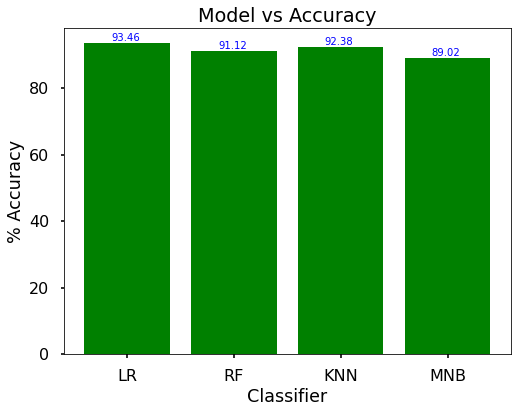

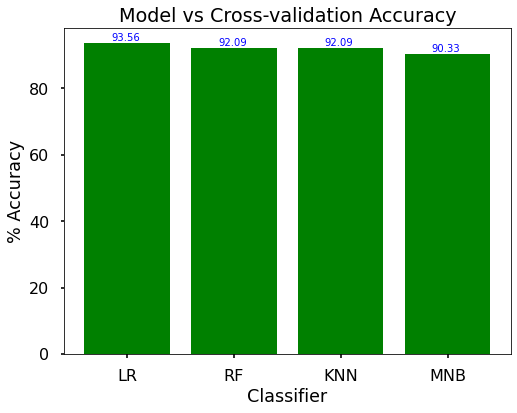

In [18]:
# Obtain plots
VisualizeResults("Model vs Accuracy", model_accuracy_without_cross_validation, plt1)
VisualizeResults("Model vs Cross-validation Accuracy", model_accuracy_with_cross_validation, plt2)
